In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Questão 23


## 1) Entrar os coeficientes

min $z = 14x1 + 20x2$

sujeito a

$1x1 + 2x2 >= 4$

$7x1 + 6x2 >= 20$

consideração: entrar com as restrições em formado de >= 

In [34]:
A = [[1, 2],[7, 6]]
B = [4, 20]
C = [14, 20]
prob = 'min'
ineq = []
non_negative = True

## 2) printar a função objetiva e as restrições

In [35]:
def f_a(A, B, C, prob, ineq, non_negative=True) -> None:
    ineq = []

    if not ineq:
        if prob == 'max':
            ineq = ['<='] * len(B)
        elif prob == 'min':
            ineq = ['>='] * len(B)

    print(f"Otimização de:  {prob} Z = {C[0]}x + {C[1]}y")

    print("\nSujeito a:")
    for i in range(len(A)):
        print(f"        {A[i][0]}x + {A[i][1]}y {ineq[i]} {B[i]}")
    
    if non_negative:
        print("\n Tal que: x, y >= 0")

    return None

In [36]:
f_a(A, B, C, prob, ineq, non_negative)

Otimização de:  min Z = 14x + 20y

Sujeito a:
        1x + 2y >= 4
        7x + 6y >= 20

 Tal que: x, y >= 0


## 3) printar a função objetiva e as restrições

### Melhorar essa etapa do codigo, pois ainda nao usa os coeficientes, essa etapa é hard code

Text(0, 0.5, '$y$')

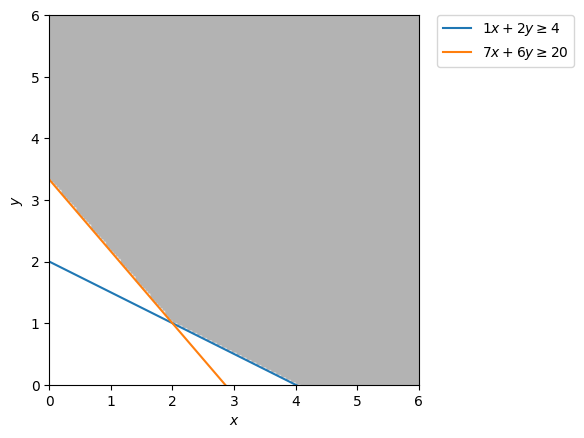

In [37]:
d = np.linspace(-2,10,300)

x,y = np.meshgrid(d,d)

plt.imshow( ((2*y >= (4- 1*x)) & #    1x + 2y >= 4
             (6*y >= (20 - 7*x)) #  7x + 6y >= 20

             ).astype(int) , 
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.3);


# plot the lines defining the constraints
#Dado que x = x1 
#         y = x2

x = np.linspace(0, 10, 2000)
y1 = ((4 - 1*x)/2.00)
y2 = ((20 - 7*x)/6.00)

# Make plot
#plt.plot(3, 0)
plt.plot(x, y1, label=r'$1x + 2y \geq 4$')
plt.plot(x, y2, label=r'$7x + 6y \geq 20$')
plt.xlim(0,6)
plt.ylim(0,6)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

## 4) Calcular as interseções

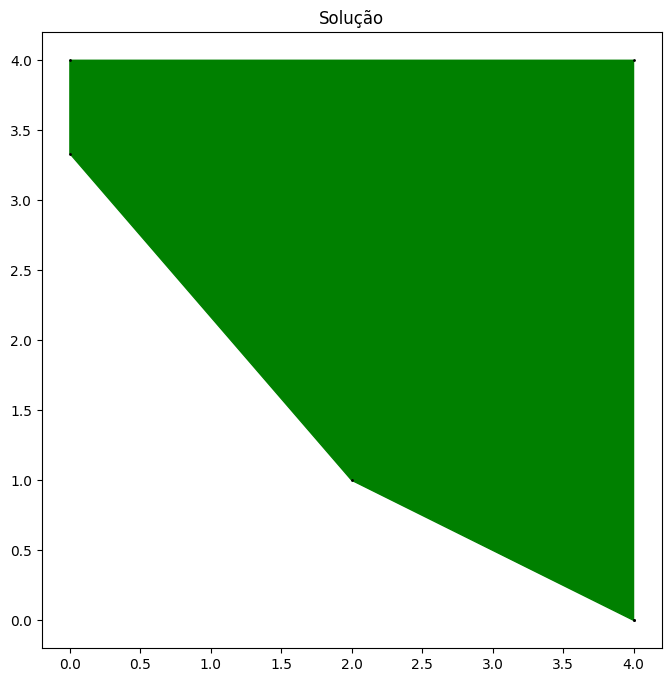

In [38]:
from intvalpy import lineqs
import numpy as np

A = np.array(A)
b = np.array(B)

dots = lineqs(A, b, title='Solução', s=1.0, bounds=[[0, 0], [4, 4]], color='Green', alpha=1.0, size=(8,8), save=True)

In [39]:
print(dots)

[[4.         0.        ]
 [2.         1.        ]
 [0.         3.33333333]
 [0.         4.        ]
 [4.         4.        ]]


## 5) Calcular os calores da função objetica

In [40]:
print(f"Dado: Z = {C[0]}x + {C[1]}y \n")

z_solutions = {}
x_list = []
for dot in dots:
    solution = round(C[0]*dot[0] + C[1]*dot[1], 4)
    ponto = f"{dot[0]},{dot[1]}"
    z_solutions.update({solution: ponto})
    
    print(f"Z({ponto}) = {solution}")

Dado: Z = 14x + 20y 

Z(4.0,0.0) = 56.0
Z(2.0,1.0) = 48.0
Z(0.0,3.333333333333) = 66.6667
Z(0.0,4.0) = 80.0
Z(4.0,4.0) = 136.0


In [41]:
z_solutions

{56.0: '4.0,0.0',
 48.0: '2.0,1.0',
 66.6667: '0.0,3.333333333333',
 80.0: '0.0,4.0',
 136.0: '4.0,4.0'}

 ## 6) Retornar o valor de menor ou maior dependendo da otimizacao

In [42]:
z_solutions[min(z_solutions)]

'2.0,1.0'

In [43]:
if prob == 'max':
    print(f"O valor maximo da zona factivel é {max(z_solutions)} encontrado no ponto Z({z_solutions[max(z_solutions)]})")
elif prob == 'min':
    if min(z_solutions) < 0:
        result = min(z_solutions) * -1
    else:
        result = min(z_solutions)
    print(f"O valor minimo da zona factivel é {result} encontrado no ponto Z({z_solutions[min(z_solutions)]})")

O valor minimo da zona factivel é 48.0 encontrado no ponto Z(2.0,1.0)
